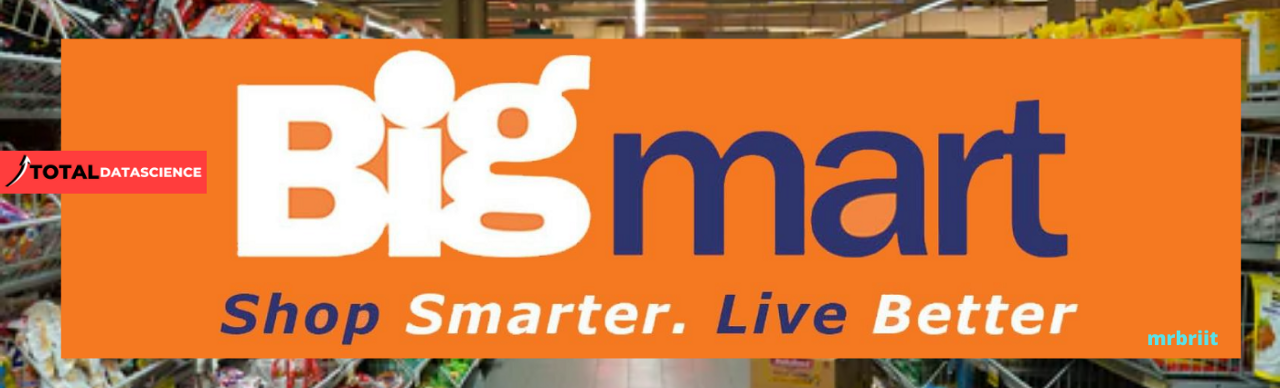

## Big Data Mart Sales Problem
### Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
Big_train = pd.read_csv('bigdatamart_Train.csv')

In [3]:
Big_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### checking for null values

In [4]:
Big_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Checking  with the  help of  heatmap 

<AxesSubplot:>

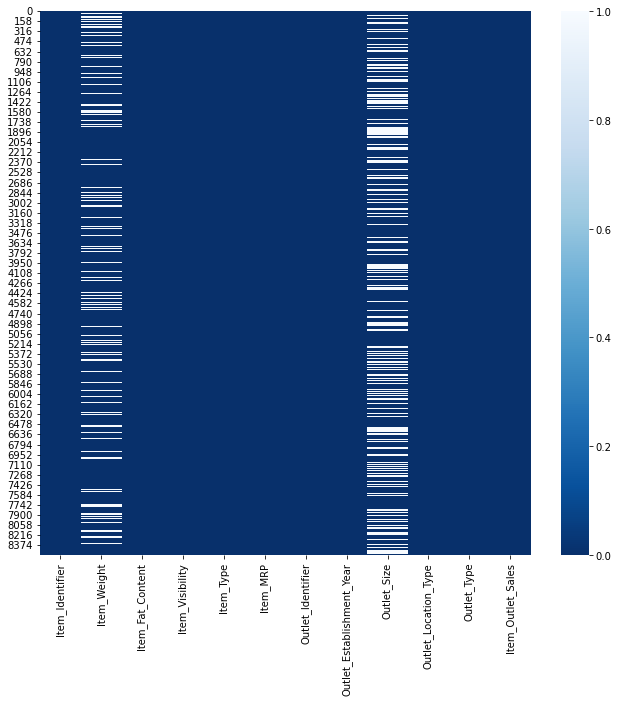

In [5]:
plt.figure(figsize=(11,10))
sns.heatmap(Big_train.isna(), cmap='Blues_r')

So we  can see  that the  train set has  so many of null  values  prsent 

In [6]:
Big_train.shape

(8523, 12)

##### column  counts  in the  datset

In [7]:
Big_train.columns.value_counts().sum()

12

In [8]:
## loading  all  the  columns  names  here 
Big_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Dataframe Description:


Features:

Item_Identifier : ID of item

Item_Weight : Weight of item

Item_Fat_Content : Fat content of the item

Item_Visibility: Estimates the customer reach of the item

Item_Type : Type of item

Item_MRP : Maximum Retail Price of Item

Outlet_Identifier : ID of Retail Outlet

Outlet_Establishment_Year : Year in which Retail Outlet was established

Outlet_Size : Size of Outlet

Outlet_Location_Type : The tier of the city where the Retail outlet is located

Outlet_Type : whether grocery store or a type of supermarket


Label/Target Variable:

Item_Outlet_Sales: The total sales made by an outlet

'Item_Visibility' has 353 '0' values

#### Getting the Unique  values  from the  columns

In [9]:
Big_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type  has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has  3 unique categories

Outlet_Location_Type has  3 unique categories

Outlet_Type has 4 unique categories


In [10]:
Big_train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Item_Fat_Content has 5 unique categories

Item_Type has 16 unique categories

Outlet_Identifier has 10 unique categories

Outlet_Establishment_Year 9 discrete values

Outlet_Size has 3 unique categories

Outlet_Location_Type has 3 unique categories

Outlet_Type has 4 unique categories

#### Getting the basic summary and statistical information of the data.

In [11]:
Big_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Item_Fat_Content, Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type  are object type meaning they are categorical in nature, while Outlet_Establishment_Year is discrete int type,

In [12]:
Big_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above tables it is observed that the outlets have been operating from as early as 1985, on an average the outlets have been running since 1997, with last one having been established in 2009.

The average MRP of the items is 140.9 and 50% of the items are priced upto around 143. 

The average sales made by the outlets is 2181.28

##### Imputing all  the  Null Values in the datasets with  the mean , median and mode 

'Item Weight' has 17.18% null values

'Outlet_Size' has 28.26% null values

In [13]:
Big_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [14]:
Big_train['Outlet_Size'].fillna("Medium",inplace=True)

so  we  can see  that we  have  filled   some values with this mode 

In [15]:
Big_train['Item_Weight'].fillna(Big_train['Item_Weight'].mean(),inplace=True)

In [16]:
Big_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### Exploration of  the  dataset (EDA )

univariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

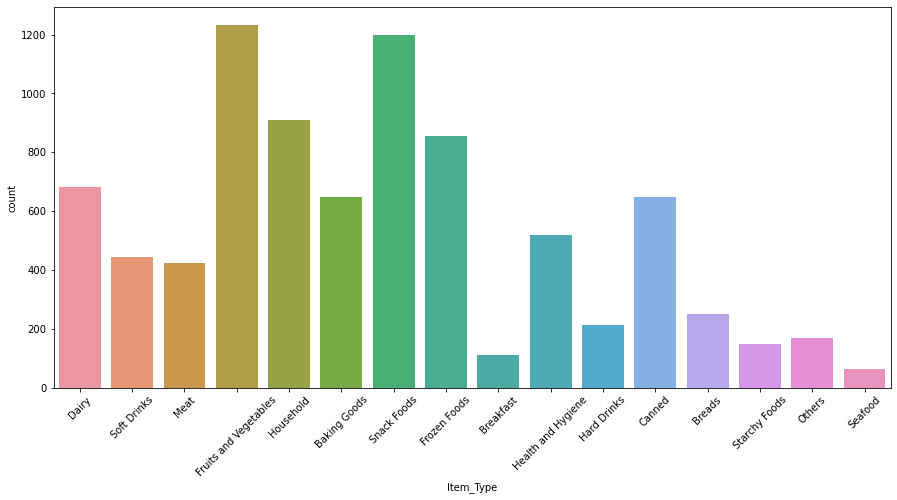

In [17]:
plt.figure(figsize = (15,7))
sns.countplot(Big_train.Item_Type)
plt.xticks(rotation = 45)

It shows the count of items sold per item type

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

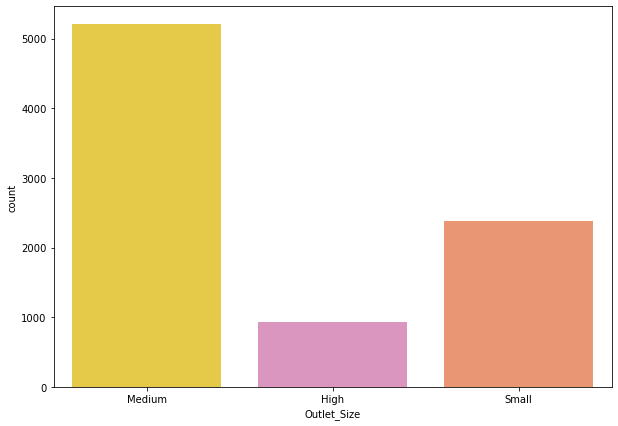

In [18]:
plt.figure(figsize = (10,7))
sns.countplot(Big_train.Outlet_Size, palette ='Set2_r')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Count'>

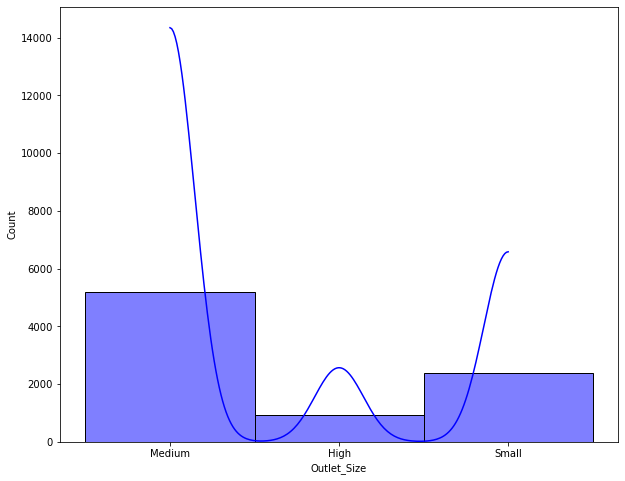

In [19]:
plt.figure(figsize = (10,8))
sns.histplot(Big_train.Outlet_Size, color ='b',kde='True ')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

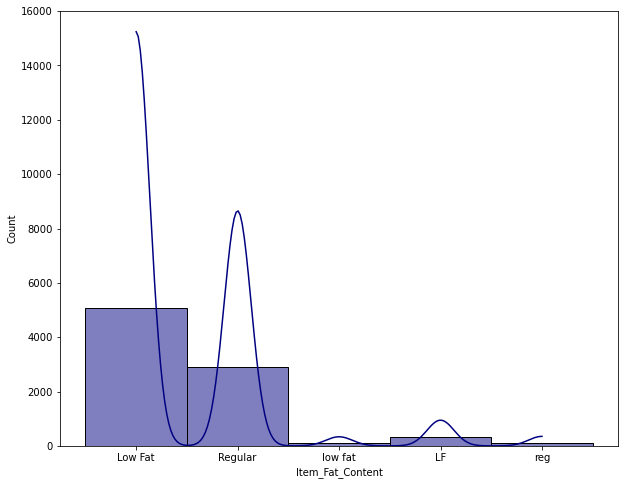

In [20]:
plt.figure(figsize = (10,8))
sns.histplot(Big_train.Item_Fat_Content, kde='True ', color='navy')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

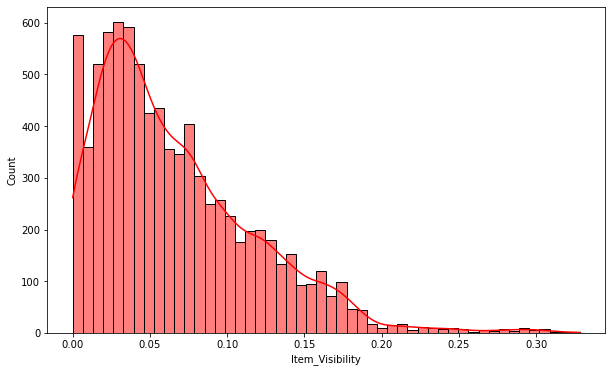

In [21]:
plt.figure(figsize = (10,6))
sns.histplot(Big_train.Item_Visibility, kde='True ', color='red')

<AxesSubplot:xlabel='Item_MRP'>

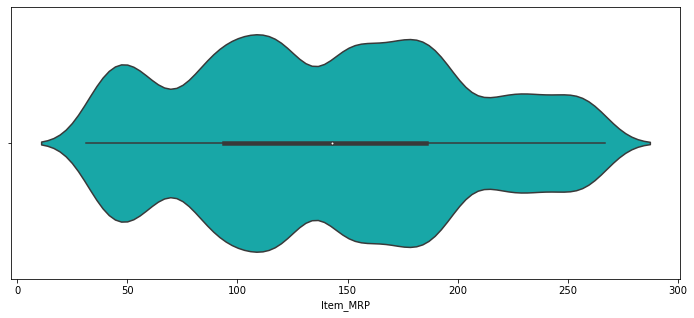

In [22]:
plt.figure(figsize=(12,5))
sns.violinplot(data=Big_train , x ='Item_MRP', color ='c')

so  we  can see  that  the max of  the MRP lies  between  the  range of -- 100  to 200

<function matplotlib.pyplot.show(close=None, block=None)>

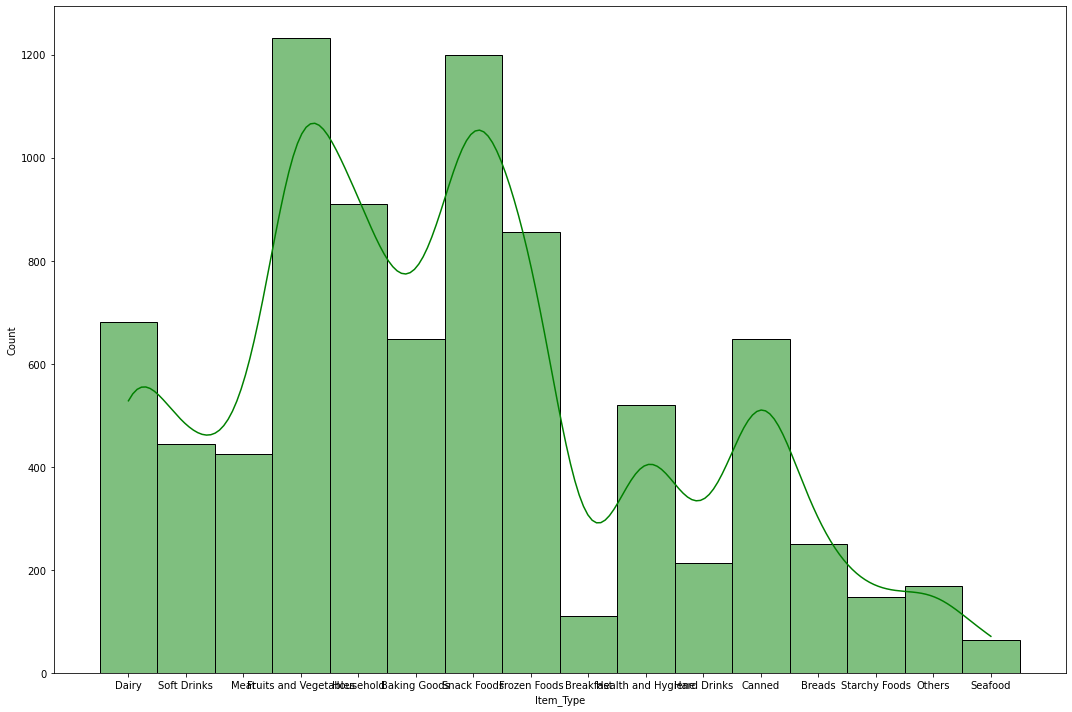

In [23]:
plt.figure(figsize = (15,10))
sns.histplot(Big_train.Item_Type, kde='True ', color='g')
plt.tight_layout()
plt.show

As  here  we  can see  that  the Snack  foods  vegetable and  the Household  foods   touches  the highest  in the  the  hist  graph thus  this  the  max  in the item type   than  others 

<function matplotlib.pyplot.show(close=None, block=None)>

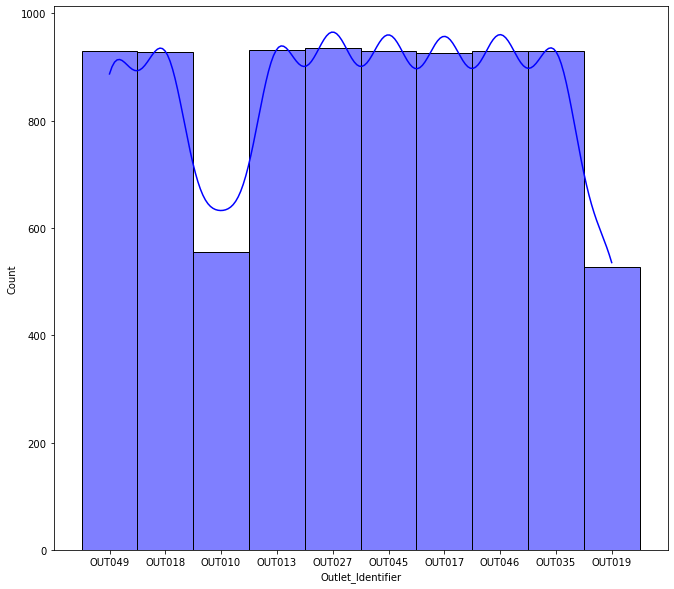

In [24]:
plt.figure(figsize = (11,10))
sns.histplot(Big_train.Outlet_Identifier, kde='True ', color='b')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

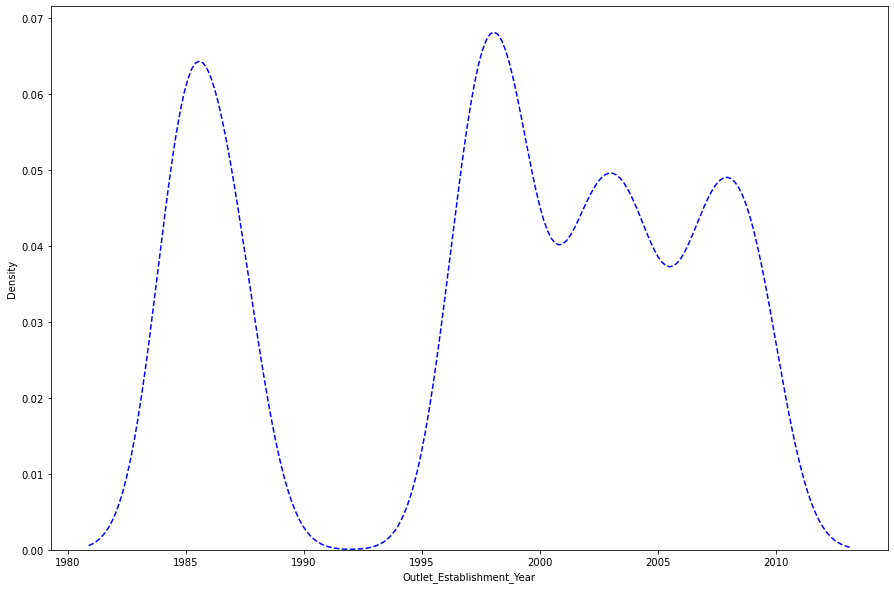

In [25]:
plt.figure(figsize = (15,10))
sns.kdeplot(Big_train.Outlet_Establishment_Year, color='b', linestyle='--')
plt.show

As  here  we can see  that  the most of  the  outlets  are being established -- in the  year between  1995 to 2000 followed  by the  year 1985

<function matplotlib.pyplot.show(close=None, block=None)>

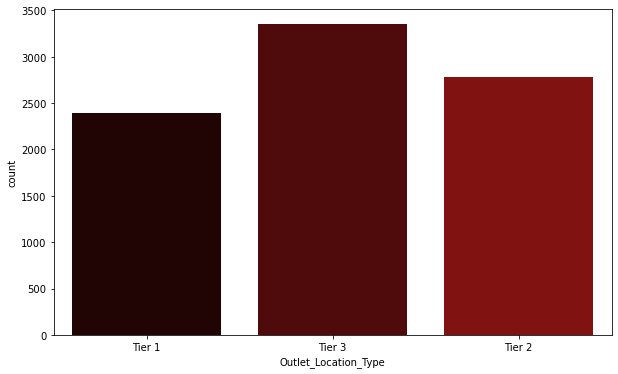

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(Big_train.Outlet_Location_Type, palette ='flag_r', linestyle='--')
plt.show

So  we  can see  here  that  the  there  are  highest  of  the  tier 3 location type   in the  dataset

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

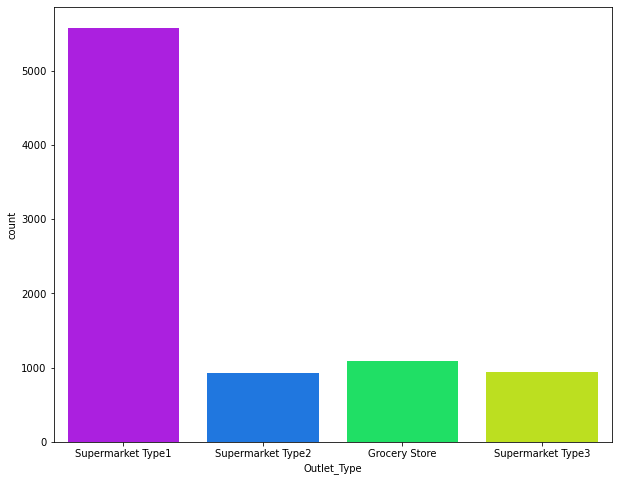

In [27]:
plt.figure(figsize = (10,8))
sns.countplot(Big_train.Outlet_Type,  palette='hsv_r')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

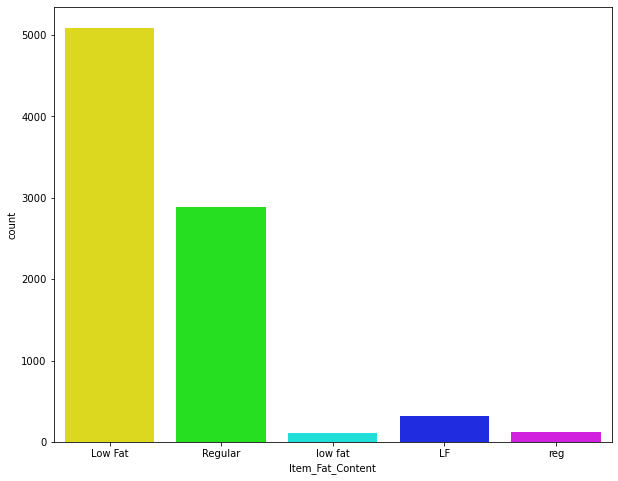

In [28]:
plt.figure(figsize = (10,8))
sns.countplot(Big_train.Item_Fat_Content, palette='hsv')

So  here also we  can  see  that  the  unit of  the item fat content  we  have  the products more  of  low  fat  content   followed  by regular 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

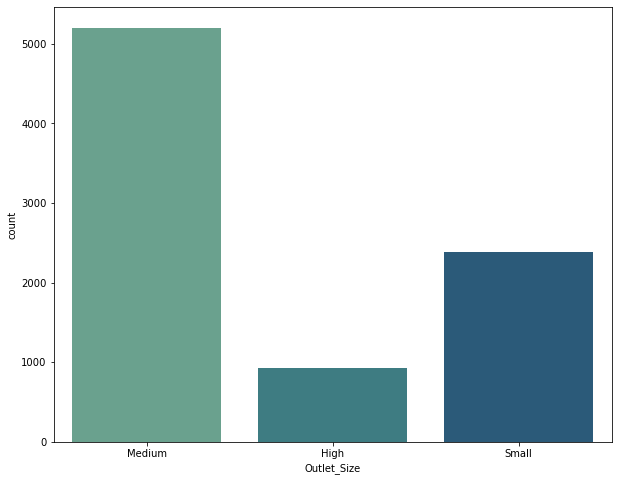

In [29]:
plt.figure(figsize = (10,8))
sns.countplot(Big_train.Outlet_Size, palette='crest')

#### multivariate  Analysis 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

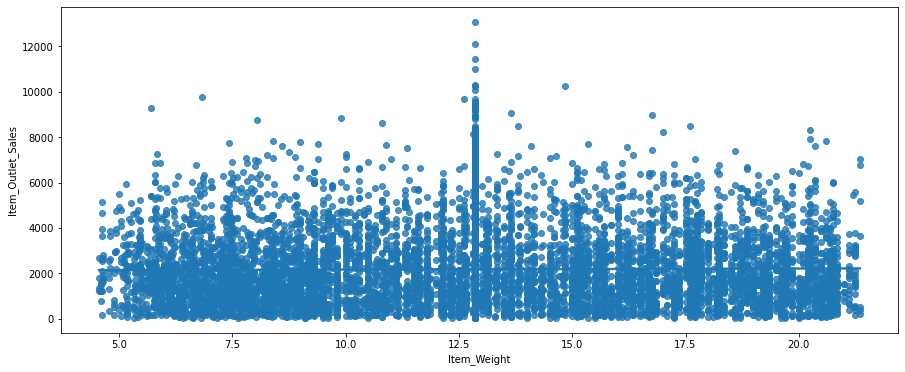

In [30]:
plt.figure(figsize=(15,6))
sns.regplot(data=Big_train, x ='Item_Weight', y ='Item_Outlet_Sales')

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

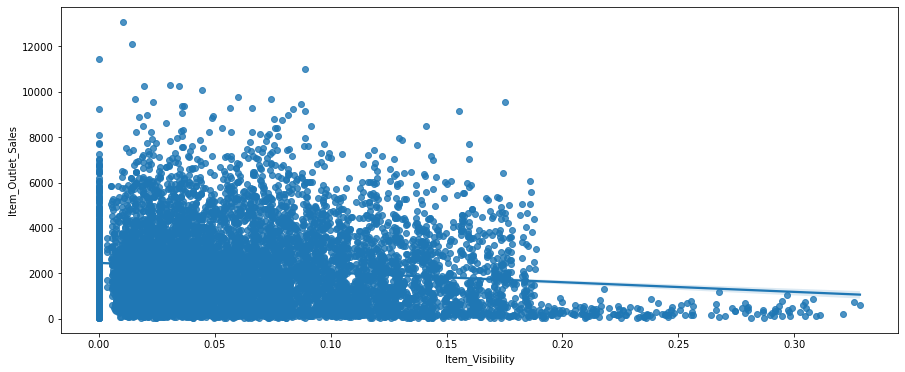

In [31]:
plt.figure(figsize=(15,6))
sns.regplot(data=Big_train, x ='Item_Visibility', y ='Item_Outlet_Sales')

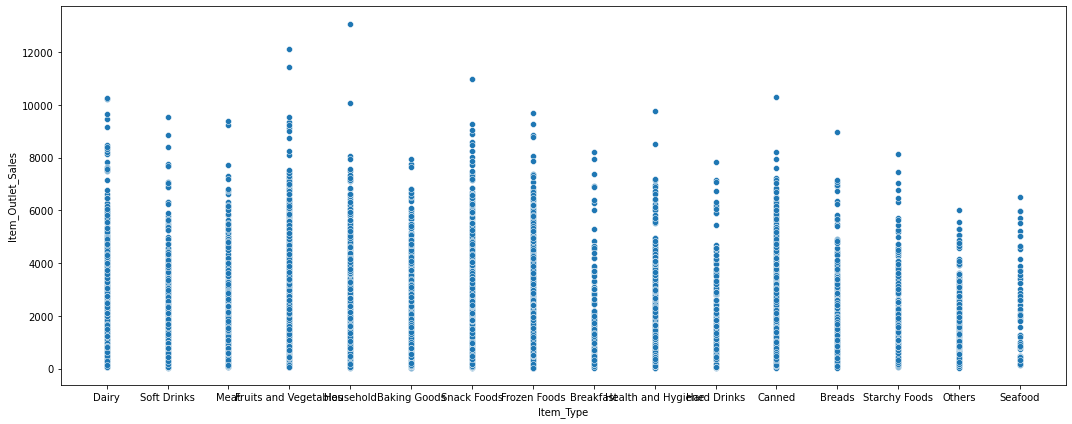

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_train, x ='Item_Type', y ='Item_Outlet_Sales')
plt.tight_layout()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

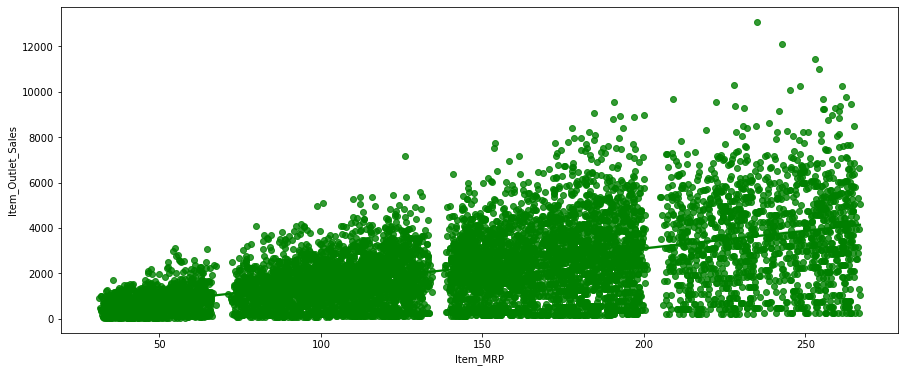

In [33]:
plt.figure(figsize=(15,6))
sns.regplot(data=Big_train, x ='Item_MRP', y ='Item_Outlet_Sales', color ='g')

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

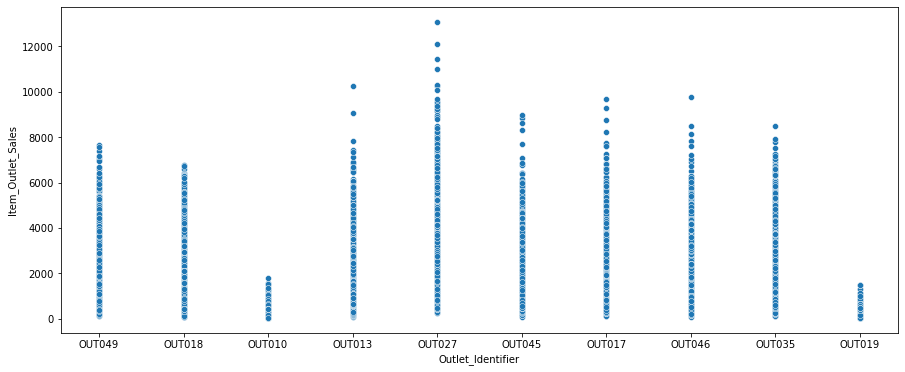

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_train, x ='Outlet_Identifier', y ='Item_Outlet_Sales',palette ='Set1')

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

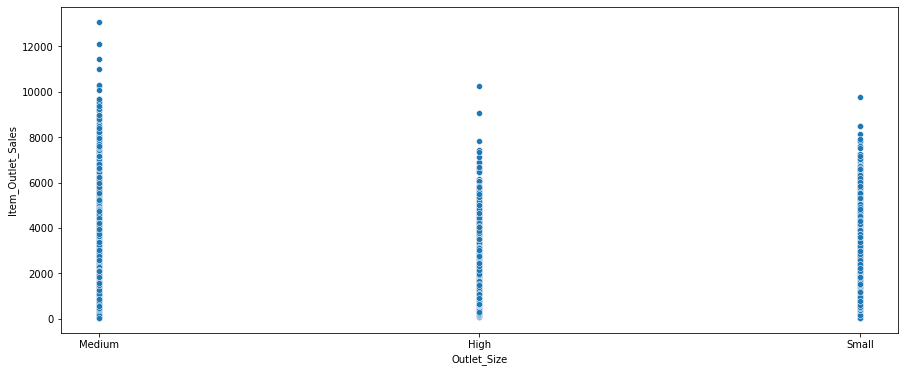

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=Big_train, x ='Outlet_Size', y ='Item_Outlet_Sales',palette ='Set1')

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

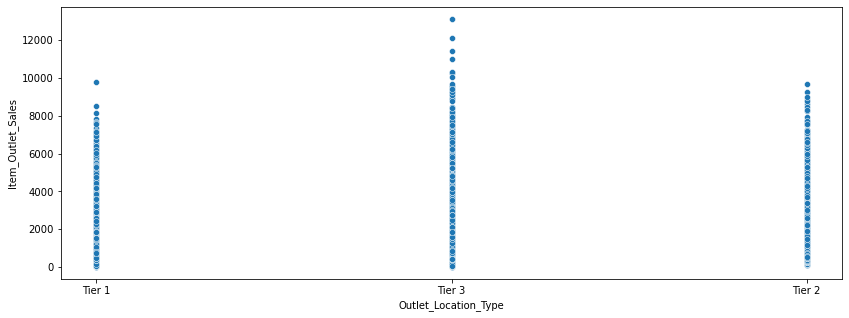

In [36]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=Big_train  , x='Outlet_Location_Type', y ='Item_Outlet_Sales')

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

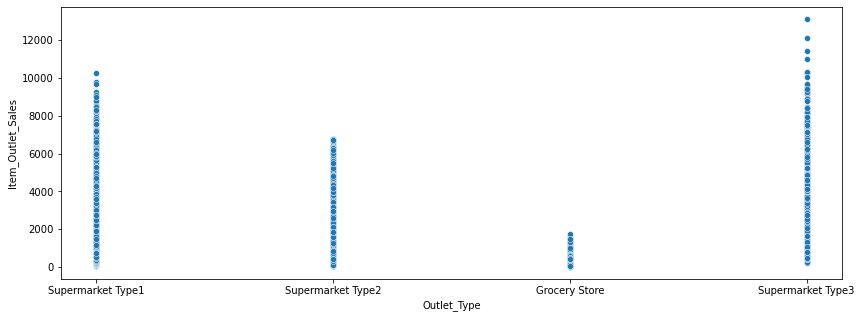

In [37]:
plt.figure(figsize=(14,5))
sns.scatterplot(data=Big_train  , x='Outlet_Type', y ='Item_Outlet_Sales')

we  have  more  of  the  numbers  of  medium  outlet size  followed  by  the  small outlet size and   we have  very few  of   the  high outlet size 

##### multivariate  analysis plot

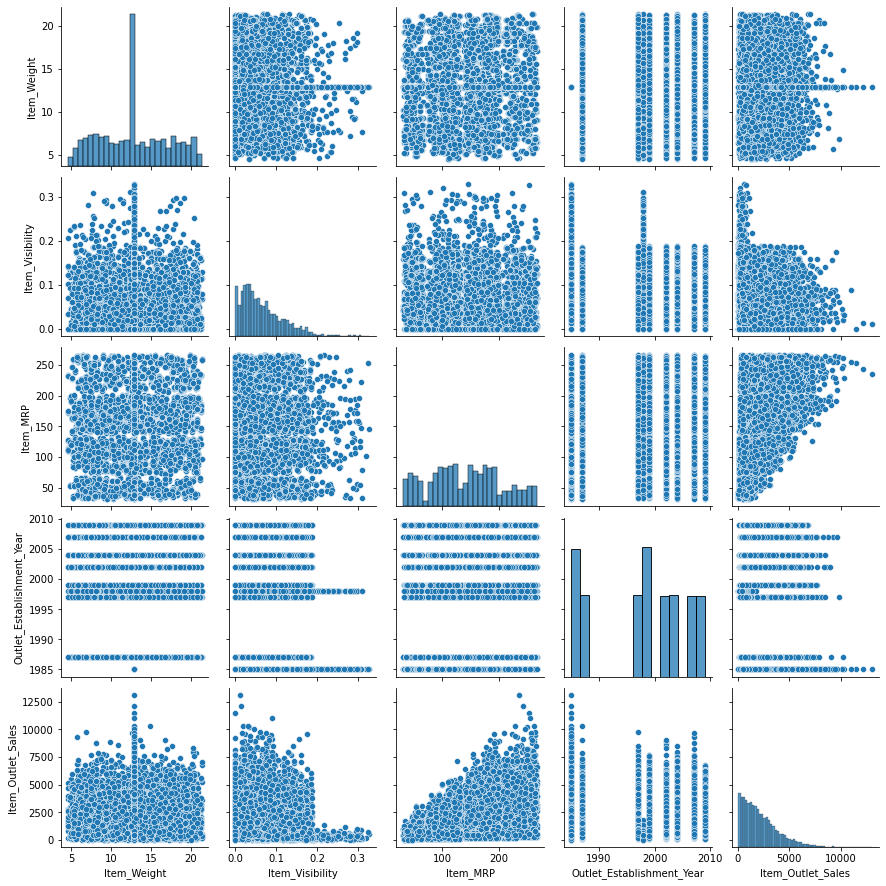

In [38]:
sns.pairplot(Big_train, palette='Set_3')

#### outliers  Checking & Analysis

<AxesSubplot:>

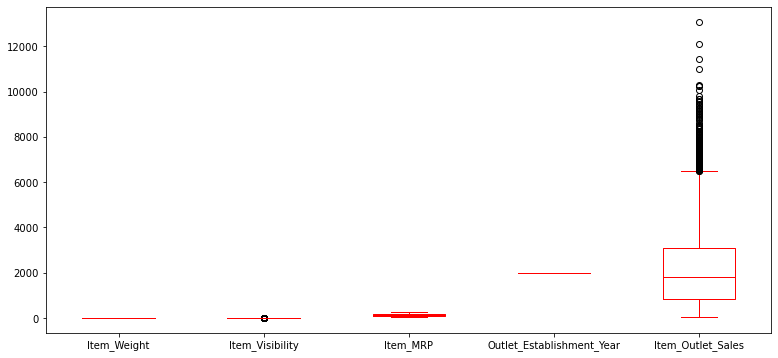

In [39]:
Big_train.plot(kind="box", figsize = (13,6), color="r")


so  we  can see  that we  have  only  some   outliers  in the  item_visibility  column

In [40]:
Big_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


so  we have  some  hight  variance  in the  item MRP  there might be  chances   that of  a  outliers  there  but  still not  very sure 

#### Correlation Analysis

In [41]:
Big_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


#### Correalation using the Heatmap

Text(0.5, 1.0, 'Correlation matrix')

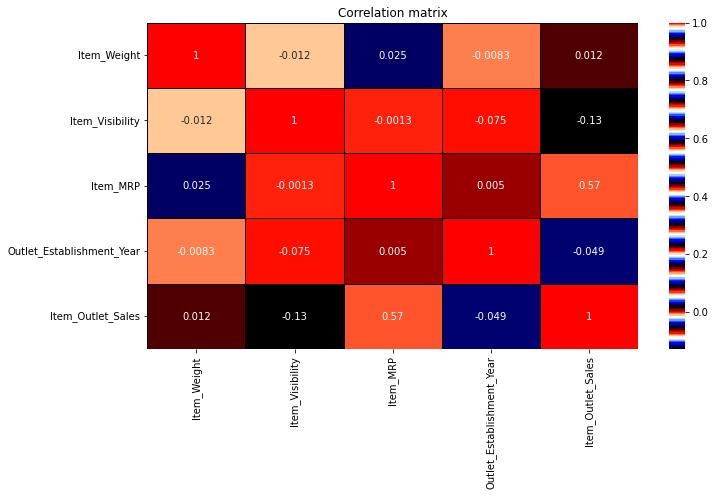

In [42]:
plt.figure(figsize=(11,6))
sns.heatmap(Big_train.corr(), annot =True, cmap='flag_r' , linecolor='black', linewidth=1,  robust=True)
plt.title('Correlation matrix')

#### Encoding  using  the  Ordinal encoder 

In [43]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
Big_train["Outlet_Type"] = ord_enc.fit_transform(Big_train[["Outlet_Type"]])
Big_train['Outlet_Location_Type'] =ord_enc.fit_transform(Big_train[["Outlet_Location_Type"]])
Big_train['Outlet_Size'] =ord_enc.fit_transform(Big_train[["Outlet_Size"]])
Big_train['Item_Fat_Content'] =ord_enc.fit_transform(Big_train[["Item_Fat_Content"]])
Big_train['Item_Type'] =ord_enc.fit_transform(Big_train[["Item_Type"]])

In [44]:
Big_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


#### Checking  for the Skewness

In [45]:
Big_train.skew()

Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

#### Data  cleaning

In [46]:
Big_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

so we  have alreay imputed   all the Nan  values earlier only

#### Removing  some  neccessary ouliers 

In [47]:
# Using zscore to remove outliers in the feature item visibility
variables= Big_train[['Item_Visibility']]
from scipy.stats import zscore

z=np.abs(zscore(variables))

# Creating new dataframe
new_df=Big_train[(z<3).all(axis=1)]
new_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.920,2.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.500,1.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.200,2.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.930,1.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1.0,0.056783,13.0,214.5218,OUT013,1987,0.0,2.0,1.0,2778.3834
8519,FDS36,8.380,2.0,0.046982,0.0,108.1570,OUT045,2002,1.0,1.0,1.0,549.2850
8520,NCJ29,10.600,1.0,0.035186,8.0,85.1224,OUT035,2004,2.0,1.0,1.0,1193.1136
8521,FDN46,7.210,2.0,0.145221,13.0,103.1332,OUT018,2009,1.0,2.0,2.0,1845.5976


In [48]:
'This is  the new  old data',Big_train.shape

('This is  the new  old data', (8523, 12))

In [49]:
'This is  the  new  train data ', new_df.shape

('This is  the  new  train data ', (8428, 12))

In [50]:
# Let's check the the data loss
data_loss = (8523-8428)/8523*100
data_loss

1.1146309984747156

so  we  have a very minimal  data loss here 

##### Splitting the  data  into X and y

In [51]:
x = new_df.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'], axis=1)
y =new_df.iloc[:,-1]

In [52]:
x.shape

(8428, 9)

In [53]:
y.shape

(8428,)

In [54]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1.0,0.016047,4.0,249.8092,1999,1.0,0.0,1.0
1,5.920,2.0,0.019278,14.0,48.2692,2009,1.0,2.0,2.0
2,17.500,1.0,0.016760,10.0,141.6180,1999,1.0,0.0,1.0
3,19.200,2.0,0.000000,6.0,182.0950,1998,1.0,2.0,0.0
4,8.930,1.0,0.000000,9.0,53.8614,1987,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
8518,6.865,1.0,0.056783,13.0,214.5218,1987,0.0,2.0,1.0
8519,8.380,2.0,0.046982,0.0,108.1570,2002,1.0,1.0,1.0
8520,10.600,1.0,0.035186,8.0,85.1224,2004,2.0,1.0,1.0
8521,7.210,2.0,0.145221,13.0,103.1332,2009,1.0,2.0,2.0


#### Removing  the  skewness  with  the power_transformer

In [55]:
from sklearn.preprocessing  import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.820763  , -0.52071354, -1.14226961, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       [-1.73031914,  1.01170173, -1.03291304, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 1.08264587, -0.52071354, -1.11787359, ..., -0.28556618,
        -1.3800971 , -0.14516058],
       ...,
       [-0.49544676, -0.52071354, -0.53775357, ...,  1.39823948,
        -0.13724678, -0.14516058],
       [-1.3704964 ,  1.01170173,  1.53830862, ..., -0.28556618,
         1.08970949,  1.03470397],
       [ 0.49007876, -0.52071354, -0.268203  , ...,  1.39823948,
        -1.3800971 , -0.14516058]])

In [56]:
x.shape

(8428, 9)

In [57]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-0.285566,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,-0.285566,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-0.285566,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,-0.285566,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,-1.921762,1.089709,-0.145161
...,...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,-1.921762,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.285566,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,1.398239,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,-0.285566,1.089709,1.034704


In [58]:
pd.DataFrame(x).skew()

0   -0.068809
1    0.031597
2    0.115444
3   -0.164518
4   -0.114976
5   -0.213023
6   -0.041756
7   -0.221268
8    0.009297
dtype: float64

In [59]:
x = pd.DataFrame(x)

As  for  now  we  can see  that  we  have removed   the  skewness  from the  model 

#### Plotting  the  columns  for  checking  the Normal distributions

Text(0.5, 1.0, 'The Normal distribution Kernel density estimators  for all  the columns')

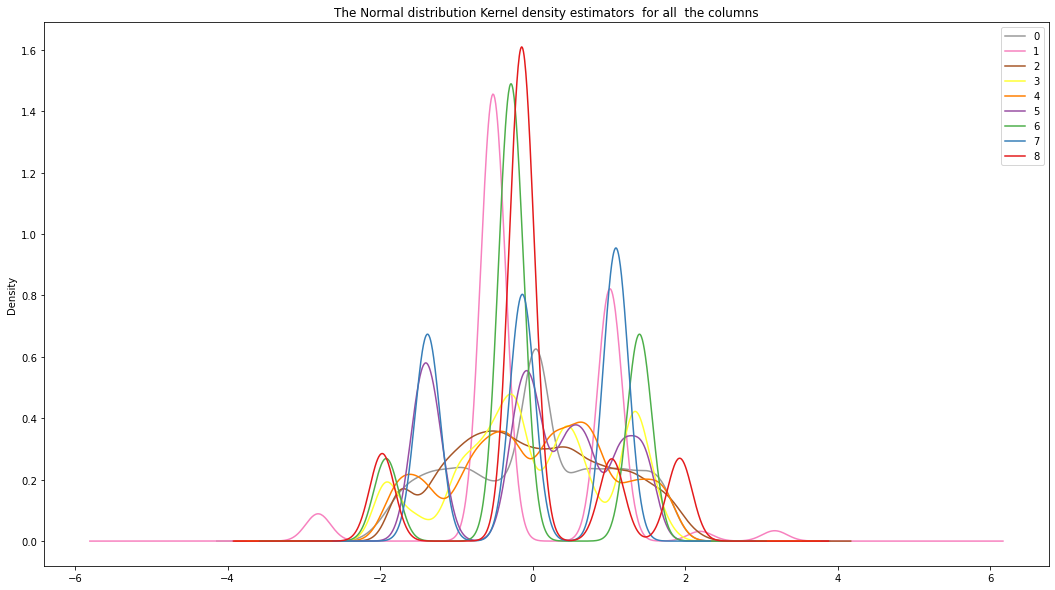

In [60]:
x.plot( kind='kde', figsize=(18,10), stacked=False, cmap='Set1_r')
plt.title('The Normal distribution Kernel density estimators  for all  the columns')

 ###### so  for  now  we can see almost  most  of  them areon the Normal distribution curve  but because of  some  inverse relationships  we  are  having  some plots  that are -ve skewed  still  which just shows  us  that they are  having  a inverse  relation with  the target variable 

#### Feature  Engineering & Feature selection

Varince  threshold method 

In [61]:
from sklearn.feature_selection import VarianceThreshold
# we are  importing  the  sklearn's  feature  selection technique  here  to extract  some imp  feature   from  the  model
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(x)

VarianceThreshold(threshold=0)

In [62]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [63]:
x =pd.DataFrame(x)

In [64]:
x.columns[var_thres.get_support()]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [65]:
x.shape

(8428, 9)

In [66]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_thres.get_support()]]
print(len(cons_columns))

0


so as  we  can see  that  the with  the help  of  variance  theres we  got  to know   the  all  the  features  here are  important so  now  using the  k best

#### Selecting Kbest Feature selection 

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif

In [68]:
bestfeat = SelectKBest(score_func = f_classif, k =9)
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [69]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(9,'Score'))

   Feature     Score
4        4  3.442038
8        8  2.537242
5        5  1.193769
3        3  1.187482
2        2  1.134038
1        1  1.077495
0        0  1.036837
7        7  1.035182
6        6  1.004078


Selecting the best features based on scores above so we  can see  that  the  column  6  has most  lowest  features  for  the  prediction thus  we  can even remove  it 

In [70]:
xbest = x.drop([6],axis=1)

In [71]:
xbest

,0,1,2,3,4,5,7,8
0,-0.820763,-0.520714,-1.142270,-0.713260,1.622782,0.039060,-1.380097,-0.145161
1,-1.730319,1.011702,-1.032913,1.505750,-1.595589,1.453989,1.089709,1.034704
2,1.082646,-0.520714,-1.117874,0.684503,0.081596,0.039060,-1.380097,-0.145161
3,1.442689,1.011702,-1.734798,-0.216081,0.690021,-0.085435,1.089709,-1.974400
4,-0.915510,-0.520714,-1.734798,0.468305,-1.476469,-1.281792,1.089709,-0.145161
...,...,...,...,...,...,...,...,...
8423,-1.464995,-0.520714,0.033409,1.306137,1.147914,-1.281792,1.089709,-0.145161
8424,-1.058287,1.011702,-0.212619,-1.924399,-0.462744,0.430122,-0.137247,-0.145161
8425,-0.495447,-0.520714,-0.537754,0.246688,-0.867711,0.706147,-0.137247,-0.145161
8426,-1.370496,1.011702,1.538309,1.306137,-0.548634,1.453989,1.089709,1.034704


Text(0.5, 1.0, 'The curve after Feature  selection with 8 features')

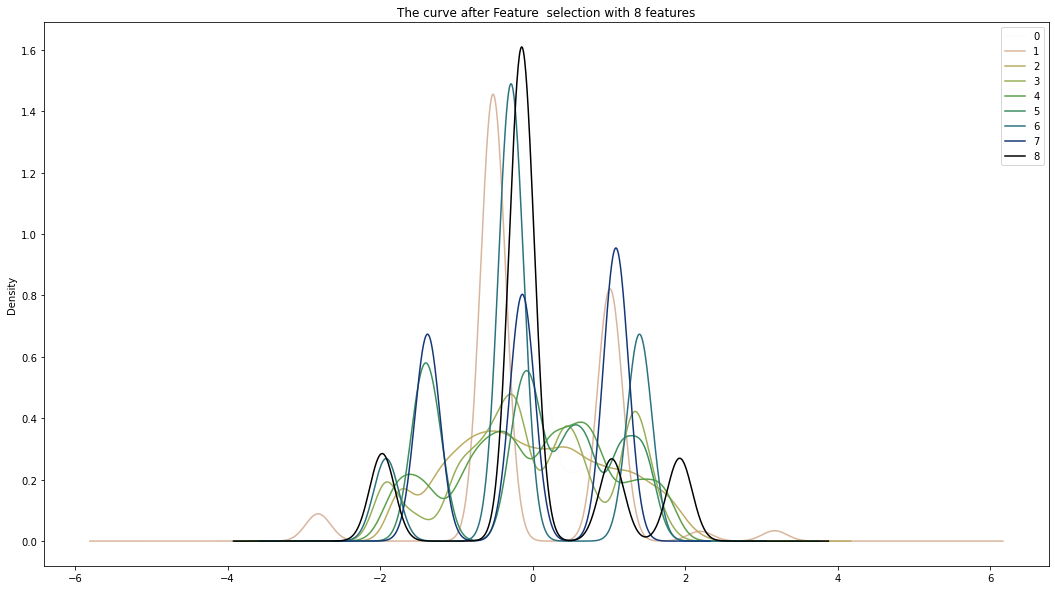

In [72]:
x.plot( kind='kde', figsize=(18,10), cmap='gist_earth_r')
plt.title('The curve after Feature  selection with 8 features')

thus   till  now we  have  done  features selection process  where we  have  used  2  techniques  now  we  will be  proceeding  further  for  building  our model

#### Building  base  model 

In [73]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error

#### Checking for the best Random state  to remove bais among the models

In [75]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.5787951461611458 on random_state: 69


#### Splittig the -train & test  data 

In [76]:
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .20, random_state = 69)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error


#### Random forest Regression Model

In [87]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=69)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.5818638135380443
Mean abs error: 791.837434035192
Mean squared error: 1277697.0196783482


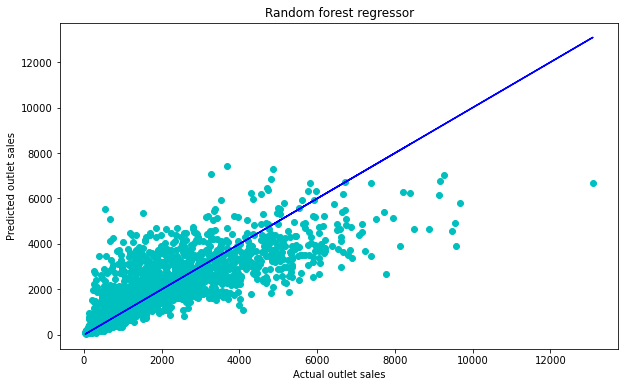

In [90]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted outlet sales")
plt.title("Random forest regressor")
plt.show()

#### Linear Regressor

In [93]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.527678404416547
Mean abs error: 908.281002512401
Mean squared error: 1443271.150753675


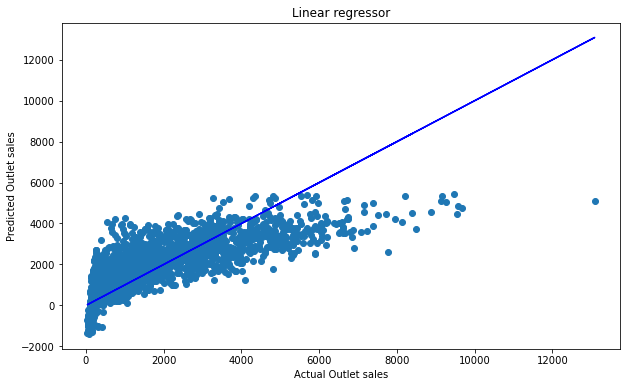

In [96]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Linear regressor")
plt.show()

#### KNN regressor 

In [105]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))

R2_Score: 0.5632589162424917
Mean abs error: 819.2629948859892
Mean squared error: 1334547.927577735


Text(0.5, 1.0, 'K-nearest neighbors  regressor')

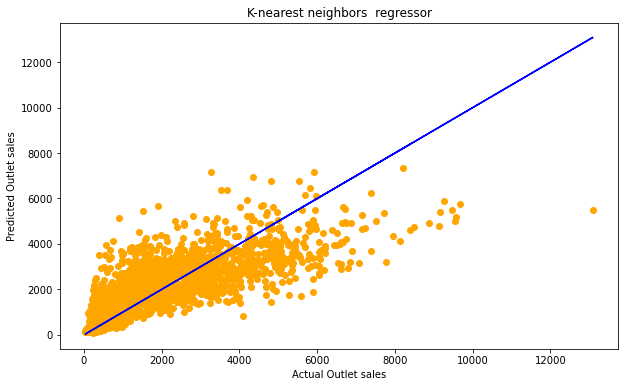

In [107]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("K-nearest neighbors  regressor")

#### Support Vector Regression Mode

In [112]:
# Checking R2 score for svr
sv= SVR(kernel='linear')
sv.fit(x_train,y_train)

#prediction
predsv=sv.predict(x_test)
print('R2_Score:',r2_score(y_test,predsv))
print('Mean abs error:',mean_absolute_error(y_test, predsv))
print('Mean squared error:',mean_squared_error(y_test, predsv))

R2_Score: 0.4802061956939644
Mean abs error: 907.5741162263959
Mean squared error: 1588331.783069723


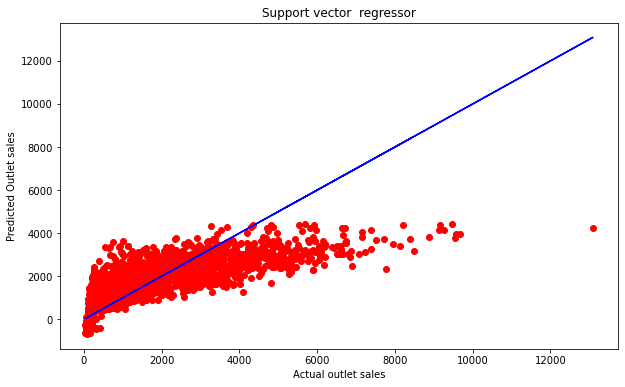

In [126]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predsv,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual outlet sales")
plt.ylabel("Predicted Outlet sales")
plt.title("Support vector  regressor")
plt.show()

#### Grdient boosting  Regressor

In [117]:
# Checking R2 score for svr
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=69, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))

R2_Score: 0.5955279575181525
Mean abs error: 778.8346001136067
Mean squared error: 1235943.5512986665


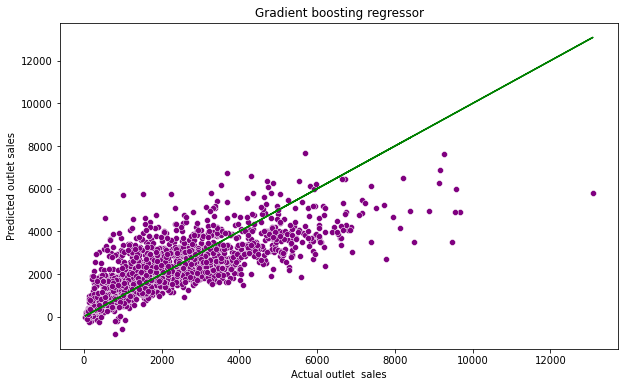

In [118]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test,y=predGb,color='purple')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet  sales")
plt.ylabel("Predicted outlet sales")
plt.title("Gradient boosting regressor")
plt.show()

so we  can see  that  the  gradient  boosting  regressor  is   giving  the result  even better  than  the Random forest  regressor   thus  we  will be  now  going  for  the  cross  validation of all the  model  to remove  any  overfitting 

### Model Cross Validation

In [119]:
from sklearn.model_selection import cross_val_score

#### Random forest Regression

In [120]:
cross_val_score(RFR,xbest,y,cv=5).mean()

0.54395140648955

#### Linear Regressor 

In [121]:
cross_val_score(LR,xbest,y,cv=5).mean()

0.51709186007786

#### KNN regressor 

In [122]:
cross_val_score(knn,xbest,y,cv=5).mean()

0.5365587769010979

#### SVR Regression

In [123]:
cross_val_score(sv,xbest,y,cv=5).mean()

0.470651096630084

#### Gradient Boosting  Regressor 

In [124]:
cross_val_score(Gb,xbest,y,cv=5).mean()

0.5677682486686063

#### So accroding to  the  Cross  validation score  of  all  the model  we  can see  that the best   cv  score  is  here is  again for  the  gradient boosting  regressor 

### Hyper Parameter Tuning

fot  the Gradient boosting  regressor  with GridsearchCV

In [125]:
from sklearn.model_selection import GridSearchCV

In [131]:
parameter = {'n_estimators':[100,200,300,400],
'learning_rate':[0.1,0.01,0.001,1],
 'subsample': [0.1,0.2,0.3,0.5,1],
 'max_depth':[1,2,3,4],
 'alpha':[0.1,0.01,0.001,1]}

In [133]:
GridCV = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)

In [134]:
GridCV.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [135]:
GridCV.best_params_

{'alpha': 0.001,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 400,
 'subsample': 1}

In [138]:
Best_mod = GradientBoostingRegressor(n_estimators=400,alpha=0.001,learning_rate= 0.01, max_depth= 3, subsample = 1)
Best_mod.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, learning_rate=0.01, n_estimators=400,
                          subsample=1)

In [139]:
gbpred = Best_mod.predict(x_test)

acc = r2_score(y_test,gbpred)
print(acc*100)

62.15178249365144


##### so after  the  Hypertuning   now we  have  got  a  descent  accuracy score  of 62% on Gradient  boosting 

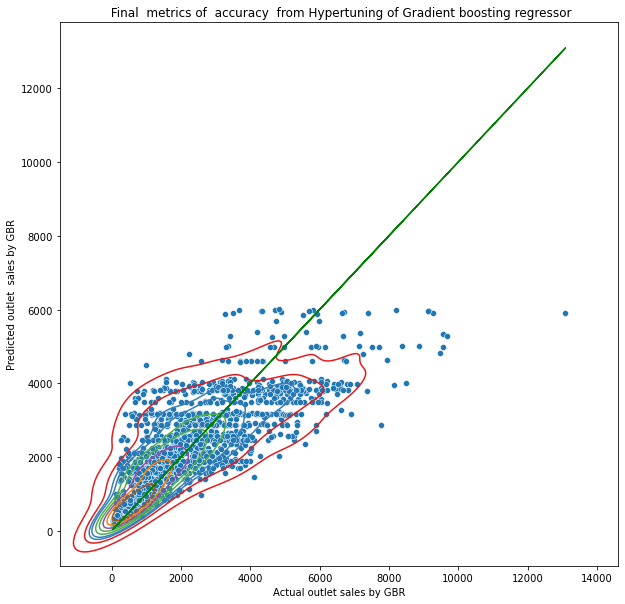

In [149]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=gbpred,palette='Set2')
sns.kdeplot(x=y_test,y=gbpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
plt.xlabel("Actual outlet sales by GBR")
plt.ylabel("Predicted outlet  sales by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

#### Saving The Predictive Model

In [140]:
import joblib
joblib.dump(Best_mod,"BestModelBM.pkl")
# dumping  to  the  local  system for any cloud deployment  further

['BestModelBM.pkl']

#### Conclusion and  the prediction by The Model

In [152]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Best_mod.predict(x_test))
Bigmart_model = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
Bigmart_model

,Original,Predicted
0,8388.4142,5021.591396
1,1640.5312,1748.657305
2,2048.6666,1893.560549
3,2966.1390,1795.975072
4,452.7440,1894.509389
...,...,...
1681,372.8480,730.823370
1682,143.8128,429.717815
1683,2024.0320,2114.767971
1684,3900.9222,2461.991118


Text(0.5, 1.0, 'Original vs predicted  graph')

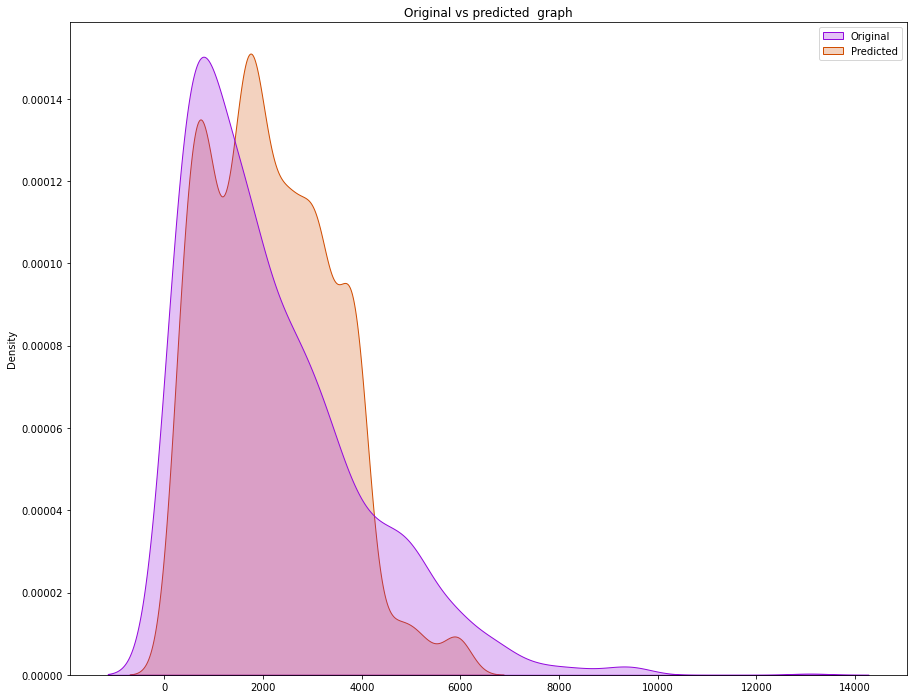

In [171]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=Bigmart_model, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

#### Thankyou  for watching